<a href="https://colab.research.google.com/github/Priyanka2508/Singapore-Flat-Resale-Price-Prediction/blob/main/Singapore_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing and settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 200)

In [2]:
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
168473,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
168474,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
168475,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
168476,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,914681.0,95.697147,25.849534,28.0,73.0,93.0,113.0,307.0
lease_commence_date,914681.0,1988.139603,10.522351,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,914681.0,317037.740320,167234.816611,5000.0,191000.0,295000.0,412000.0,1500000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914681 entries, 0 to 168477
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.7+ MB


In [ ]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [3]:
df =df.dropna()
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [ ]:
df.shape

(205631, 11)

In [ ]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [ ]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [ ]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [4]:
data = df.drop(['block','street_name','month'],axis =1)
data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,70
1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,65
2,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,64
3,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,63
4,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...
168473,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
168474,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
168475,YISHUN,EXECUTIVE,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
168476,YISHUN,EXECUTIVE,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months


In [ ]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,205631.000000,205631.000000,2.056310e+05
mean,97.246125,1994.958800,4.808988e+05
std,24.054037,13.567355,1.653964e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.600000e+05
50%,94.000000,1995.000000,4.500000e+05
75%,112.000000,2004.000000,5.700000e+05
max,280.000000,2022.000000,1.500000e+06


In [5]:
data['remaining_lease'] = data['remaining_lease'].astype(str).apply(lambda x: int(x[:2]))

In [6]:
data['storey_range'] = data['storey_range'].apply(lambda x:((int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205631 entries, 0 to 168477
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 205631 non-null  object 
 1   flat_type            205631 non-null  object 
 2   storey_range         205631 non-null  float64
 3   floor_area_sqm       205631 non-null  float64
 4   flat_model           205631 non-null  object 
 5   lease_commence_date  205631 non-null  int64  
 6   resale_price         205631 non-null  float64
 7   remaining_lease      205631 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 14.1+ MB


In [ ]:
!pip install seaborn
!pip install matplotlib

In [8]:
# Check distribution
def plot(data, column):
  plt.figure(figsize =(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data = data, x= column)
  plt.title(f'Box Plot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data = data, x= column, kde = True, bins = 50)
  plt.title(f'Distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data = data, x= column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

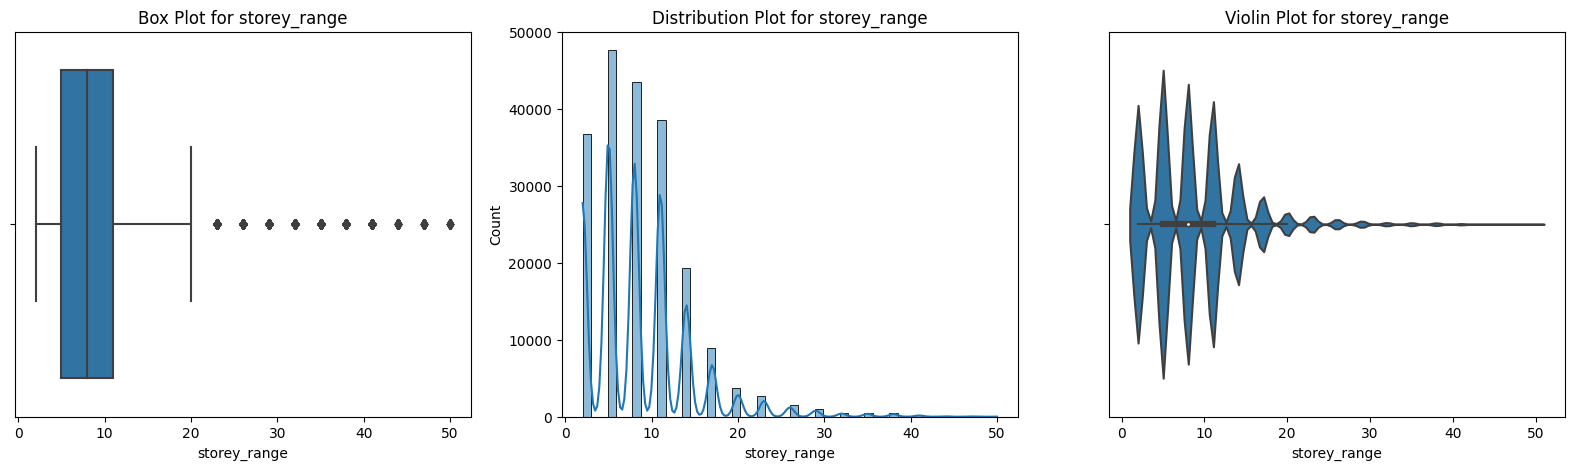

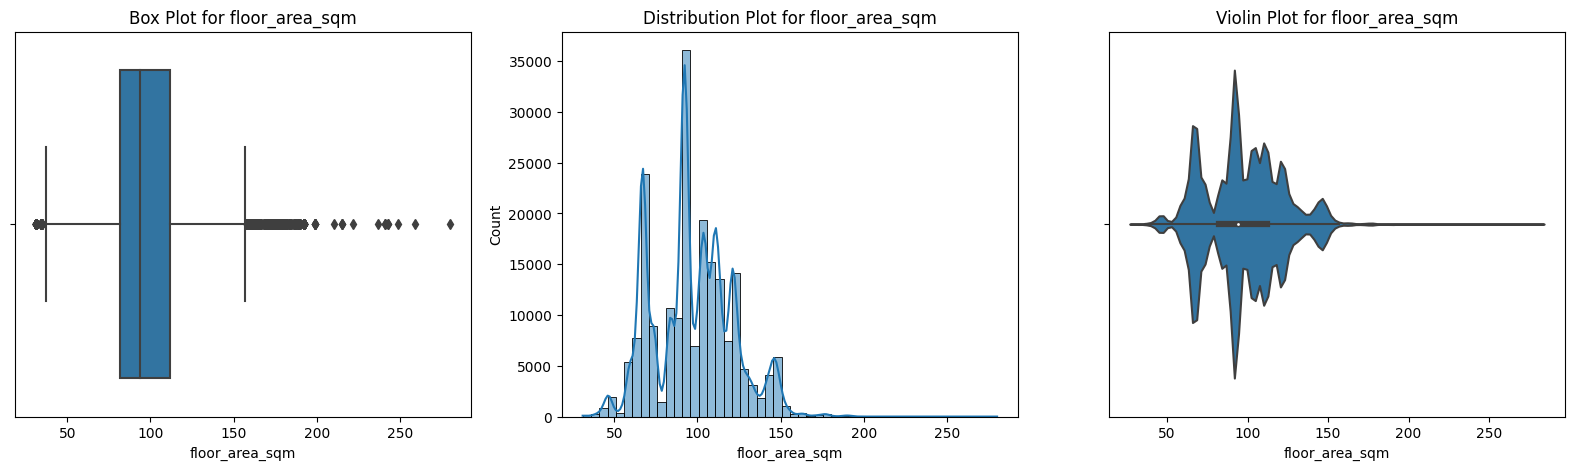

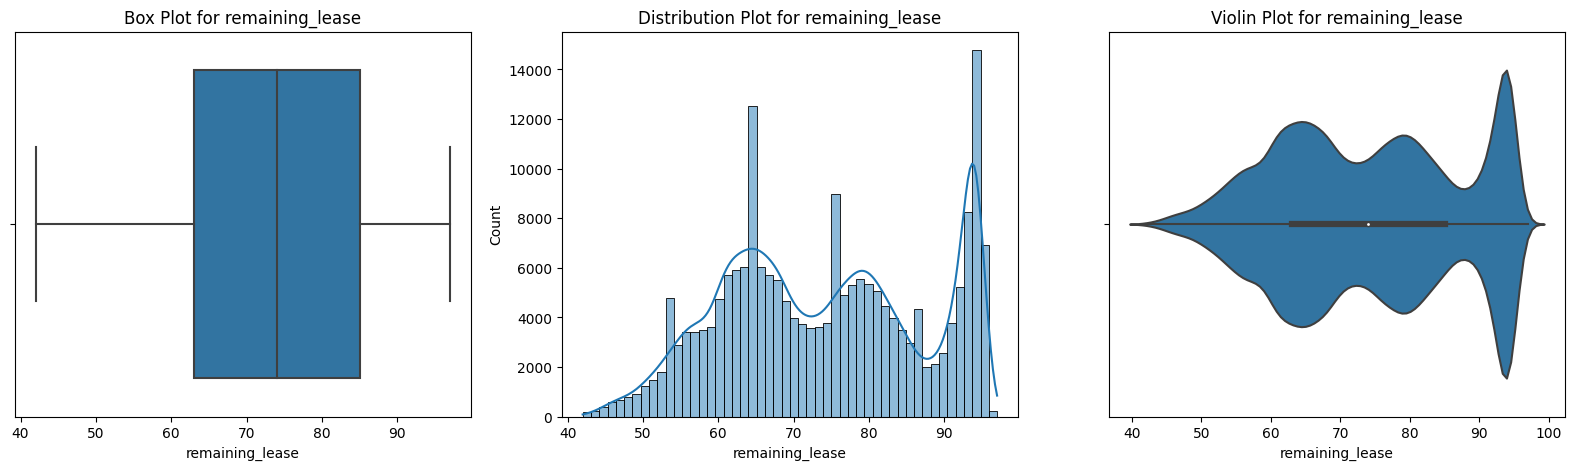

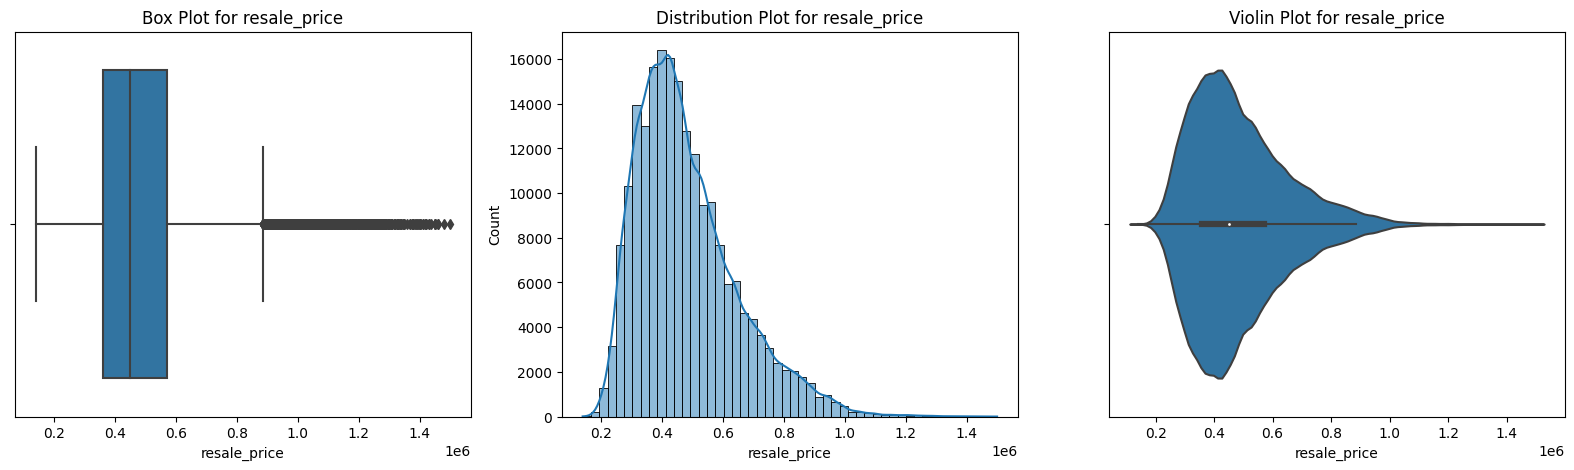

In [ ]:
for i in ['storey_range','floor_area_sqm','remaining_lease','resale_price']:
  plot(data,i)


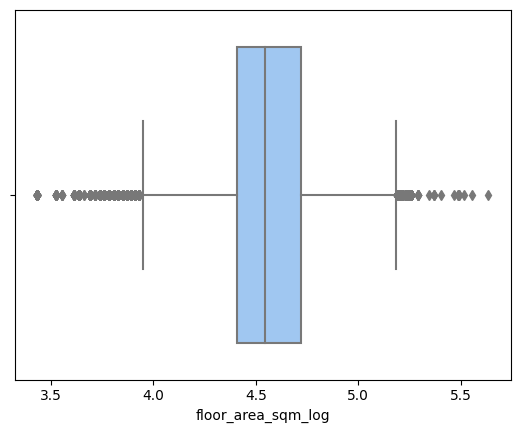

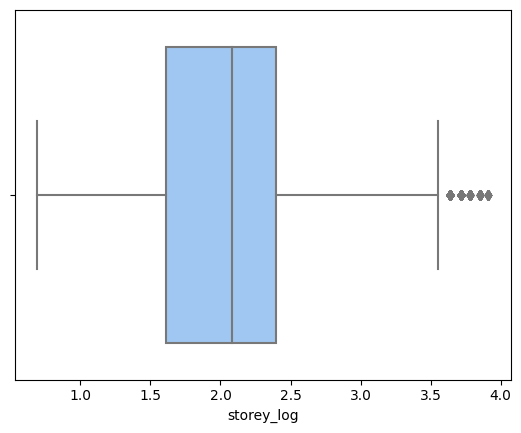

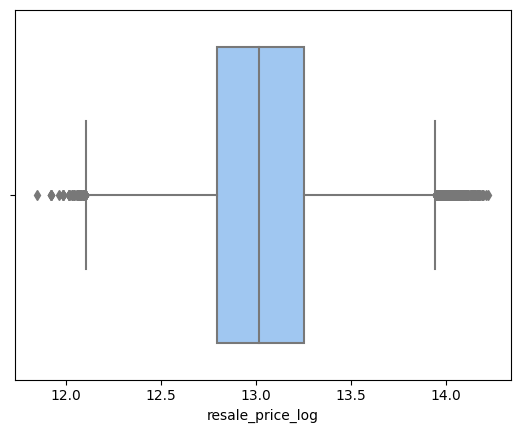

In [9]:

# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
                                                                # effect on the data, so no need to apply for that columns

data['floor_area_sqm_log'] = np.log(data['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm_log', data=data)
plt.show()

data['storey_log'] = np.log(data['storey_range'])
sns.boxplot(x='storey_log', data=data)
plt.show()

data['resale_price_log'] = np.log(data['resale_price'])
sns.boxplot(x='resale_price_log', data=data)
plt.show()

In [10]:
#Check outliers

def outlier(data,column):
  IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
  upper = data[column].quantile(0.75) + (1.5*IQR)
  lower = data[column].quantile(0.75) - (1.5*IQR)
  data[column] = data[column].clip(lower, upper)



In [11]:
outlier(data, 'resale_price_log')
outlier(data, 'storey_log')
outlier(data, 'floor_area_sqm_log')


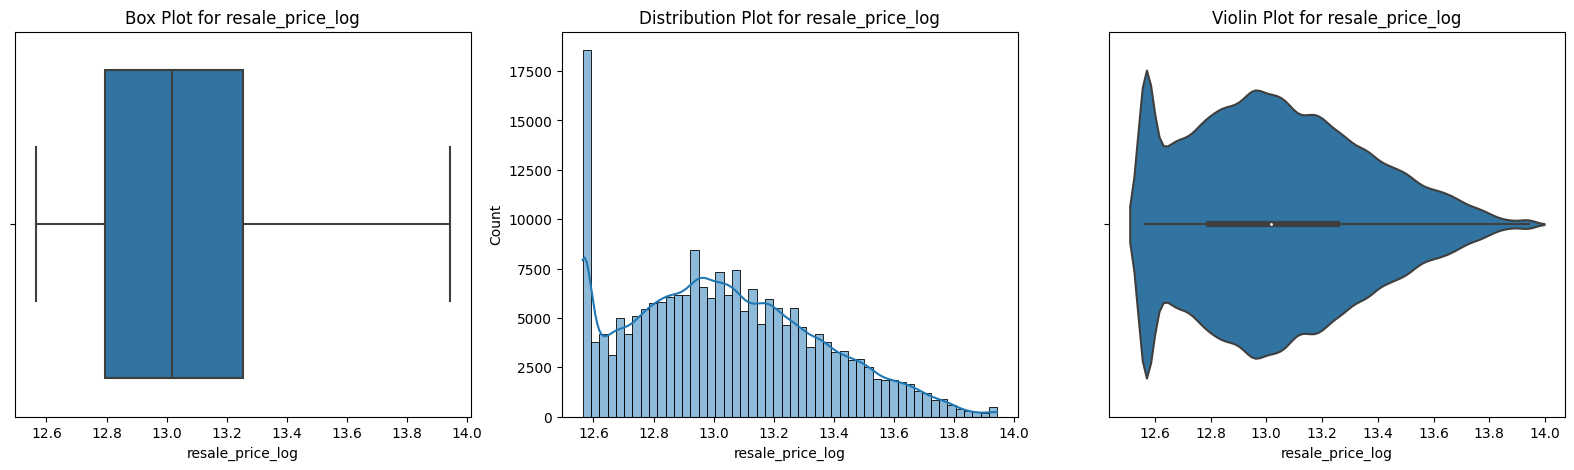

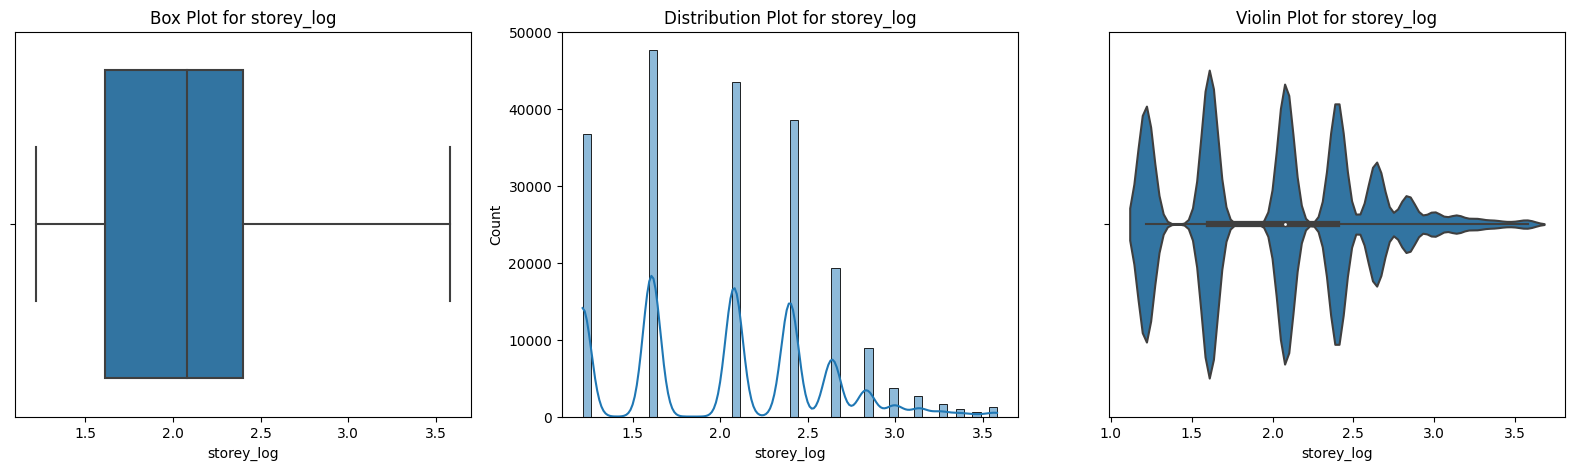

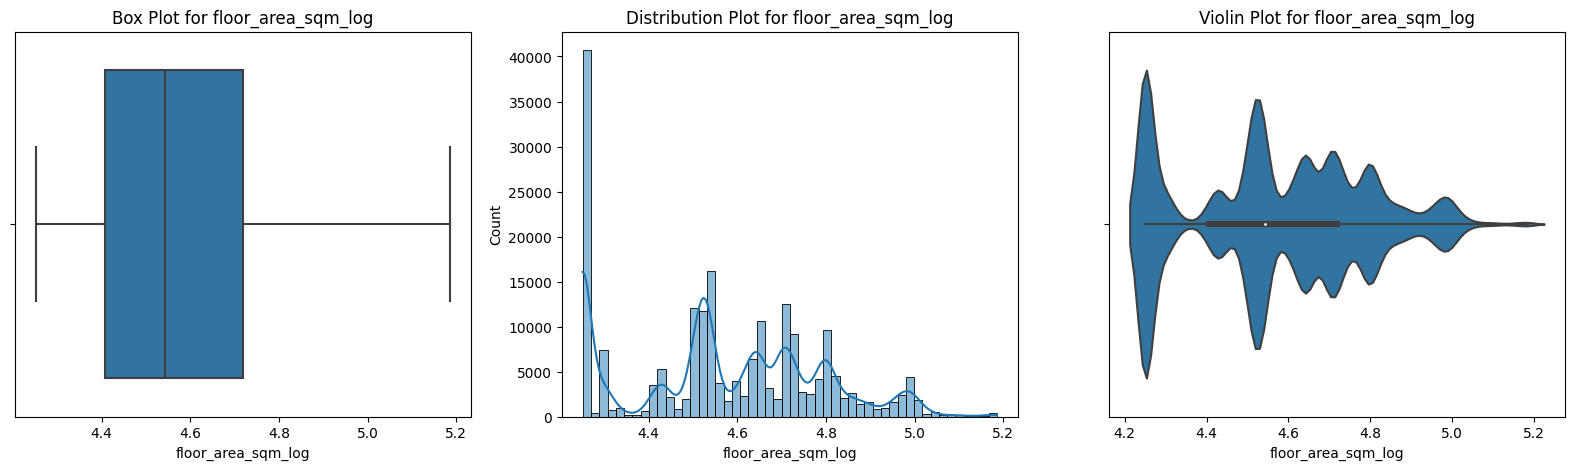

In [ ]:
for i in ['resale_price_log','storey_log','floor_area_sqm_log']:
  plot(data,i)

In [12]:
flat = data.drop(columns =['resale_price','storey_range','floor_area_sqm'])
flat.describe().T

,count,mean,std,min,25%,50%,75%,max
lease_commence_date,205631.0,1994.958800,13.567355,1966.000000,1984.000000,1995.000000,2004.000000,2022.000000
remaining_lease,205631.0,74.166191,13.365721,42.000000,63.000000,74.000000,85.000000,97.000000
floor_area_sqm_log,205631.0,4.564875,0.222413,4.250829,4.406719,4.543295,4.718499,5.186168
storey_log,205631.0,2.019976,0.567535,1.215209,1.609438,2.079442,2.397895,3.580581
resale_price_log,205631.0,13.036864,0.313702,12.564093,12.793859,13.017003,13.253392,13.942690


<Axes: title={'center': 'Correlation Heatmap'}>

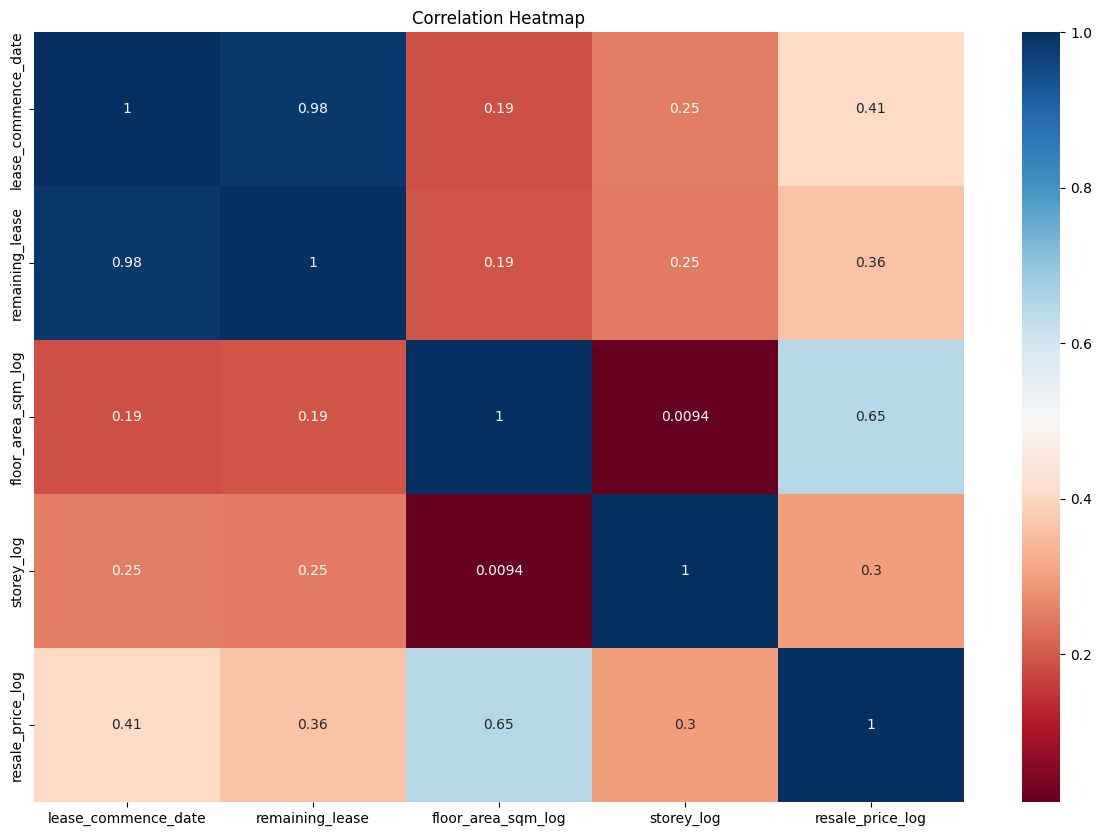

In [13]:


corrMatrix = flat.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

In [14]:
#Droppping column becuase of multicollinearity
flat.drop(['lease_commence_date'],axis =1)
flat

,town,flat_type,flat_model,lease_commence_date,remaining_lease,floor_area_sqm_log,storey_log,resale_price_log
0,ANG MO KIO,3 ROOM,Improved,1986,70,4.250829,2.079442,12.564093
1,ANG MO KIO,3 ROOM,New Generation,1981,65,4.250829,1.215209,12.564093
2,ANG MO KIO,3 ROOM,New Generation,1980,64,4.250829,1.215209,12.564093
3,ANG MO KIO,3 ROOM,New Generation,1979,63,4.250829,1.215209,12.577636
4,ANG MO KIO,3 ROOM,New Generation,1980,64,4.250829,2.079442,12.577636
...,...,...,...,...,...,...,...,...
168473,YISHUN,EXECUTIVE,Apartment,1987,63,4.955827,2.079442,13.578380
168474,YISHUN,EXECUTIVE,Maisonette,1987,62,4.983607,2.397895,13.638773
168475,YISHUN,EXECUTIVE,Apartment,1987,62,4.955827,2.397895,13.534473
168476,YISHUN,EXECUTIVE,Apartment,1988,63,4.955827,1.215209,13.567049


In [ ]:
flat['town'].value_counts()

SENGKANG           16704
WOODLANDS          14520
PUNGGOL            14079
JURONG WEST        13935
TAMPINES           13887
YISHUN             13695
BEDOK              11448
HOUGANG            10312
CHOA CHU KANG       9464
ANG MO KIO          8854
BUKIT MERAH         7835
BUKIT PANJANG       7671
BUKIT BATOK         7649
TOA PAYOH           6409
PASIR RIS           6249
KALLANG/WHAMPOA     6203
QUEENSTOWN          5662
SEMBAWANG           5499
GEYLANG             5209
CLEMENTI            4747
JURONG EAST         4277
SERANGOON           3927
BISHAN              3806
CENTRAL AREA        1793
MARINE PARADE       1286
BUKIT TIMAH          511
Name: town, dtype: int64

In [ ]:
flat['flat_model'].value_counts()

,town,flat_type,flat_model,lease_commence_date,remaining_lease,floor_area_sqm_log,storey_log,resale_price_log
0,0,3 ROOM,5,1986,70,4.250829,2.079442,12.564093
1,0,3 ROOM,12,1981,65,4.250829,1.215209,12.564093
2,0,3 ROOM,12,1980,64,4.250829,1.215209,12.564093
3,0,3 ROOM,12,1979,63,4.250829,1.215209,12.577636
4,0,3 ROOM,12,1980,64,4.250829,2.079442,12.577636
...,...,...,...,...,...,...,...,...
168473,25,EXECUTIVE,3,1987,63,4.955827,2.079442,13.578380
168474,25,EXECUTIVE,7,1987,62,4.983607,2.397895,13.638773
168475,25,EXECUTIVE,3,1987,62,4.955827,2.397895,13.534473
168476,25,EXECUTIVE,3,1988,63,4.955827,1.215209,13.567049


In [15]:
final = pd.DataFrame(flat)
final.describe()

,lease_commence_date,remaining_lease,floor_area_sqm_log,storey_log,resale_price_log
count,205631.000000,205631.000000,205631.000000,205631.000000,205631.000000
mean,1994.958800,74.166191,4.564875,2.019976,13.036864
std,13.567355,13.365721,0.222413,0.567535,0.313702
min,1966.000000,42.000000,4.250829,1.215209,12.564093
25%,1984.000000,63.000000,4.406719,1.609438,12.793859
50%,1995.000000,74.000000,4.543295,2.079442,13.017003
75%,2004.000000,85.000000,4.718499,2.397895,13.253392
max,2022.000000,97.000000,5.186168,3.580581,13.942690


In [16]:
from sklearn.preprocessing import LabelEncoder

# Remove any duplicate entries
flat.drop_duplicates(inplace=True)

# Convert categorical variables to numerical variables using Label Encoding
lc_town = LabelEncoder()
lc_model = LabelEncoder()
lc_type = LabelEncoder()

flat['town'] = lc_town.fit_transform(flat['town'])
flat['flat_model'] = lc_model.fit_transform(flat['flat_model'])
flat['flat_type'] = lc_type.fit_transform(flat['flat_type'])
flat

,town,flat_type,flat_model,lease_commence_date,remaining_lease,floor_area_sqm_log,storey_log,resale_price_log
0,0,2,5,1986,70,4.250829,2.079442,12.564093
1,0,2,12,1981,65,4.250829,1.215209,12.564093
2,0,2,12,1980,64,4.250829,1.215209,12.564093
3,0,2,12,1979,63,4.250829,1.215209,12.577636
4,0,2,12,1980,64,4.250829,2.079442,12.577636
...,...,...,...,...,...,...,...,...
168473,25,5,3,1987,63,4.955827,2.079442,13.578380
168474,25,5,7,1987,62,4.983607,2.397895,13.638773
168475,25,5,3,1987,62,4.955827,2.397895,13.534473
168476,25,5,3,1988,63,4.955827,1.215209,13.567049


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Best hyperparameters: {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean squared error: 0.006162906508103667
R-squared: 0.9332477720392365


In [ ]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [18]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('lc_town.pkl','wb') as f:
    pickle.dump(lc_town, f)
with open('lc_model.pkl','wb') as f:
    pickle.dump(lc_model, f)
with open('lc_type.pkl','wb') as f:
    pickle.dump(lc_type, f)

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 0.1


In [ ]:
ridge_pred = ridge_cv.predict(X_test)

# Calculate model performanceprint('Test R-squared score :', r2_score(y_test, ridge_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,ridge_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,ridge_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,ridge_pred)))
print('Linear Regression score:',ridge_cv.score(X_train,y_train))
print('Test Score: ',ridge_cv.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(ridge_cv, X_train, y_train, cv=5).mean())

Test R-squared score : 0.5985673233030719
Mean Squared Error:  0.037062314343053335
Mean Absolute Error:  0.1513530659178684
Root Mean Squared Error:  0.19251575089600678
Linear Regression score: 0.5999311139854009
Test Score:  0.5985673233030719
Cross Validation Score: 0.5998832484077233


In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
knr = KNeighborsRegressor()

# hyperparameters
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(1,6),
              'metric':['euclidean','manhattan']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=knr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)




Best hyperparameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}
Mean squared error: 0.007914246273166866
R-squared: 0.9142785030619238


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
rf = RandomForestRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': uniform(0.0, 0.2)
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)
